In [1]:
%pylab inline
import numpy as np
from conf_exp6 import *
import seaborn
#import utils.img_utils as iu
from utils import img_utils
import matplotlib.pyplot as plt

def mm(A, cast_int=True):
    if cast_int:
        return (int(A.min()), int(A.max()))
    else:
        return (A.min(), A.max())

Populating the interactive namespace from numpy and matplotlib


In [24]:
parameter_name = 'bsize'
formula = 'f1'
base_folder = './results/exp8/%s/%s/'%(formula, parameter_name)
#rango = [3, 4, 5, 6, 7, 8, 9, 10]
#group_sizes = group_sizes[-2:]
bsizes = [55, 50, 45, 40, 35, 30, 25, 20, 15, 10]
rango = bsizes

GROUPS=5
FITS=10
RANGO=len(rango)
print rango 

"""
REVISAR EL OTRO EL ORDEN DE LO
GUARDADO

"""


mse = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse1000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse2000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse3000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')

# example: mse1000_g0_f0.npy  
name_tmp1 = base_folder + 'mse_g%d_f%d.npy'
name_tmp2 = base_folder + 'mse%d_g%d_f%d.npy'
for group in xrange(GROUPS):
    for fit in xrange(FITS):
        mse[:, fit, group] = np.load(name_tmp1%(group, fit))
        mse1000[:, fit, group] = np.load(name_tmp2%(1000, group, fit))
        mse2000[:, fit, group] = np.load(name_tmp2%(2000, group, fit))
        mse3000[:, fit, group] = np.load(name_tmp2%(3000, group, fit))
        
        
print mse.shape


[55, 50, 45, 40, 35, 30, 25, 20, 15, 10]
(10, 10, 5)


In [4]:
mse.shape

(10, 1, 1)

In [25]:

mean = mse.mean(axis=2).mean(axis=1)
var = np.std(np.std(mse, axis=2), axis=1)

print 'rango', rango
print 'mean', mean
print 'var', var

rango [55, 50, 45, 40, 35, 30, 25, 20, 15, 10]
mean [  9.50459904e+08   9.30477184e+08   1.46944947e+09   1.48025331e+09
   1.49463859e+09   2.39661056e+09   2.40329677e+09   2.47309670e+09
   5.15571046e+09   4.99516621e+09]
var [  1.73093619e+09   1.72668826e+09   1.65638835e+09   1.61447078e+09
   1.66031718e+09   1.99439616e+09   2.03256294e+09   2.08275405e+09
   1.43739123e+09   1.38388109e+09]


In [26]:
mean1000 = mse1000.mean(axis=2).mean(axis=1)
var1000 = np.std(np.std(mse1000, axis=2), axis=1)

print 'rango', rango
print 'mean', mean1000
print 'var', var1000

rango [55, 50, 45, 40, 35, 30, 25, 20, 15, 10]
mean [  9.69507968e+08   9.69507968e+08   1.85878899e+09   1.85878899e+09
   1.85878899e+09   2.40152422e+09   2.41373389e+09   2.49188403e+09
   5.62846771e+09   5.58569370e+09]
var [  1.81719949e+09   1.81719936e+09   2.12254029e+09   2.12254029e+09
   2.12254029e+09   2.08852480e+09   2.08623514e+09   2.05112179e+09
   8.52243648e+08   1.55070438e+09]


In [27]:
mean2000 = mse2000.mean(axis=2).mean(axis=1)
var2000 = np.std(np.std(mse2000, axis=2), axis=1)

print 'rango', rango
print 'mean', mean2000
print 'var', var2000

rango [55, 50, 45, 40, 35, 30, 25, 20, 15, 10]
mean [  8.05257792e+08   7.97300736e+08   1.39747661e+09   1.39747661e+09
   1.43335590e+09   2.66772813e+09   2.64764390e+09   2.64764390e+09
              nan              nan]
var [  1.67625958e+09   1.65428147e+09   1.54719923e+09   1.54719910e+09
   1.72862694e+09   2.06141120e+09   1.93196416e+09   1.93196442e+09
              nan              nan]


In [28]:
mean3000 = mse3000.mean(axis=2).mean(axis=1)
var3000 = np.std(np.std(mse3000, axis=2), axis=1)

print mse3000[1,0,1]
print 'rango', rango
print 'mean', mean3000
print 'var', var3000

nan
rango [55, 50, 45, 40, 35, 30, 25, 20, 15, 10]
mean [  1.07532262e+09              nan              nan              nan
              nan              nan              nan              nan
              nan              nan]
var [  1.83007232e+09              nan              nan              nan
              nan              nan              nan              nan
              nan              nan]


[  9.50459904e+08   9.30477184e+08   1.46944947e+09   1.48025331e+09
   1.49463859e+09   2.39661056e+09   2.40329677e+09   2.47309670e+09
   5.15571046e+09   4.99516621e+09]
[55, 50, 45, 40, 35, 30, 25, 20, 15, 10]


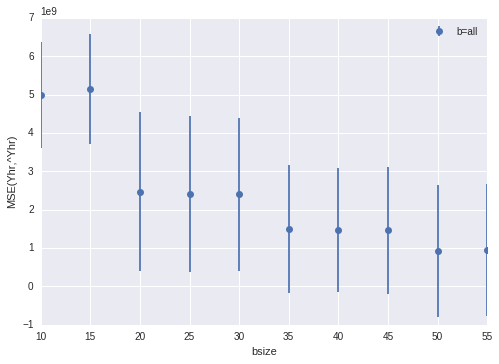

In [30]:
mean3 = np.zeros((10, 3))
mean3[:, 0] = mean1000
mean3[:, 1] = mean2000
mean3[:, 2] = mean3000

#plt.plot(rango, mean,'o', label='b=all')
plt.errorbar(rango, mean, yerr=var, fmt='o', label='b=all')
print mean


#B1000
#plt.plot(rango, mean1000,'o', label='b=1000')
#plt.errorbar(rango, mean1000, yerr=var1000, fmt='o')
#print mean1000

#B2000
#plt.plot(rango, mean2000,'o', label='b=2000')
#plt.errorbar(rango, mean2000, yerr=var2000, fmt='o',label='b=2000')
#print mean2000

#B3000
#plt.plot(rango, mean3000,'o', label='b=3000')
#plt.errorbar(rango, mean3000, yerr=var3000, fmt='o',label='b=3000')
#print mean3000



#plt.plot(rango, mean3.mean(axis=1),'o', label='b=all')
#plt.errorbar(rango, mean3.mean(axis=1), yerr=np.std(mean3, axis=1), fmt='o')


plt.legend()
plt.ylabel('MSE(Yhr,^Yhr)')
plt.xlabel(parameter_name)
#plt.legend(lala , loc=2, bbox_to_anchor=(1, 0.5))
mse[:,2,1]
#print plt.ylim((940000000.0, 960000000.0))

print rango
## Para grabar
#plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/bsize_mean_var_10a55.pdf')

(0.16235230723453697, 1.3229445867537912)
./results/exp9/f1/gsize/i_hr_g0.npy
(0.18952547038684495, 1.3260597327243016)
./results/exp9/f1/gsize/i_hr_g0.npy
(0.097052280144640304, 1.086109205366401)
./results/exp9/f1/gsize/i_hr_g0.npy
(0.16621366358880824, 1.4122068117419759)
./results/exp9/f1/gsize/i_hr_g0.npy
(0.076301637334783359, 0.96959020365689785)
./results/exp9/f1/gsize/i_hr_g0.npy
(0.013493307398461166, 1.1904883631356042)
./results/exp9/f1/gsize/i_hr_g0.npy
(-0.00041888405574992107, 1.2351096868874856)
./results/exp9/f1/gsize/i_hr_g0.npy
(-0.00046001101362771481, 1.1395697713336577)
./results/exp9/f1/gsize/i_hr_g0.npy
(0.12028458715305158, 1.4773946195094771)
./results/exp9/f1/gsize/i_hr_g1.npy
(0.083856443773534808, 1.2862099274713108)
./results/exp9/f1/gsize/i_hr_g1.npy
(0.25194732933141639, 1.2683599028241619)
./results/exp9/f1/gsize/i_hr_g1.npy
(0.13671323534782798, 1.1387005467628024)
./results/exp9/f1/gsize/i_hr_g1.npy
(0.094787325719652302, 1.1695528542529052)
./results

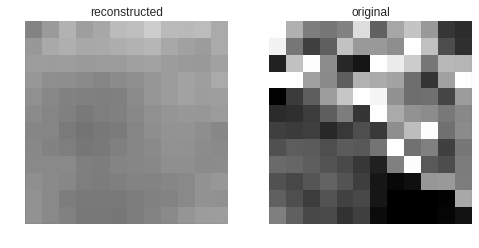

In [22]:
## Para grabar
name_tmp3 = base_folder + 'A_g%d_gsize%d.npy'
name_tmp4 = base_folder + 'i_hr_g%d.npy'
for g in xrange(5):
    for b in rango:
    #for b in xrange(8):
        A = np.load(name_tmp3%(g, b))
        print mm(A, cast_int=False)
        print name_tmp4%(g,)
        i_hr = np.load(name_tmp4%(g,))
        plt = img_utils._isc(A,i_hr, vmin=A.min(), vmax=A.max(), titles=['reconstructed', 'original'])
        name_img = (name_tmp3%(g, b))[:-3]
        plt.savefig(name_img +'png')

#plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/gammas/gamma_all.png')
    